In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
#from sklearn.utils import shuffle
import csv

#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
import itertools

Using TensorFlow backend.


In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'

In [15]:
np.random.seed(30)

In [3]:
data_frame = pd.read_csv('data.tab', sep='\t')

In [4]:
data_set = shuffle(data_frame).values

In [5]:
# split into train and test sets
train_size = int(len(data_set) * 0.70)
test_size = len(data_set) - train_size   
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

print(len(train), len(test))

210 91


In [6]:
X_train = train[:,:13]
Y_train = train[:,13:]

X_test = test[:,:13]
Y_test = test[:,13:]

In [7]:
from keras.models import load_model
new_model = load_model("heart_attack_risk_prediction.h5")

In [8]:
new_model.get_weights()

[array([[ 0.12409872,  0.24439394, -0.5521101 , -0.2851793 ,  0.309106  ,
         -0.39418155,  0.25872508,  0.2997879 , -0.23875664, -0.29803035,
          0.03988504, -0.31845057,  0.39883265, -0.44043538,  0.4020672 ,
          0.25751746],
        [ 0.38962573, -0.14177537, -0.18161672, -0.01254296,  0.3663233 ,
         -0.12335151,  0.02344329, -0.25460958, -0.7009031 ,  0.37450397,
          0.12924615, -0.20262085,  0.12021856, -0.6311201 ,  0.7842552 ,
         -0.09284434],
        [-0.41753232,  0.29684338,  0.13794024,  0.33395398, -0.01684891,
          0.05733061, -0.37147653, -0.56210667, -0.8035943 ,  0.23097813,
          0.47298422, -0.08933379, -0.3458262 ,  0.05190338,  0.14744587,
          0.14561975],
        [ 0.25458187,  0.00879666, -0.3334334 , -0.44616607,  0.47293037,
         -0.3694291 , -0.4498585 ,  0.31286985,  0.44433954, -0.01588657,
          0.23724252, -0.01356045,  0.17166378,  0.00803698,  0.37204546,
         -0.30413157],
        [-0.2922485 

In [9]:
predections = new_model.predict_classes(X_test,batch_size=10,verbose=0)

In [11]:
cm = confusion_matrix(Y_test,predections)

In [12]:
cm

array([[49,  5],
       [ 6, 31]])

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[49  5]
 [ 6 31]]


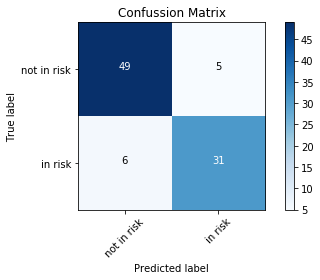

In [14]:
cm_plot_labels = ['not in risk', 'in risk']
plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')